In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
df_car_data=pd.read_csv('/content/car data.csv')

In [ ]:
df_car_data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [ ]:
df_car_data['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

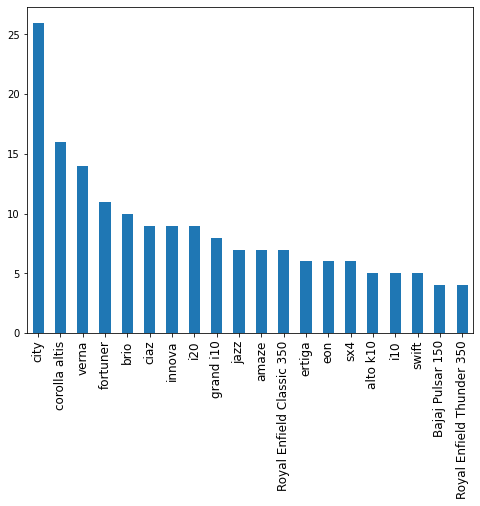

In [ ]:
plt.figure(figsize=(8,6))
df_car_data['Car_Name'].value_counts()[:20].plot(kind='bar')
plt.xticks(size=12)

In [ ]:
import plotly.express as px
plt.figure(figsize=(8,6))
Supplier_type=['Dealer','individual']
d=pd.DataFrame(df_car_data['Seller_Type'].value_counts())
fig=px.pie(d,values="Seller_Type",names=Supplier_type,labels={"label":"Seller_Type","Seller_Type":"Type of supplier"})
fig.update_layout(title = dict(text = "Pie Chart of Seller"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

<Figure size 576x432 with 0 Axes>

In [ ]:
df_car_data.dtypes[df_car_data.dtypes==object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [ ]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df_car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df_car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df_car_data[['Selling_Price']].max()

Selling_Price    35.0
dtype: float64

In [ ]:
df2=pd.DataFrame(df_car_data.groupby(['Year'],as_index=False, sort=False)['Selling_Price'].mean())

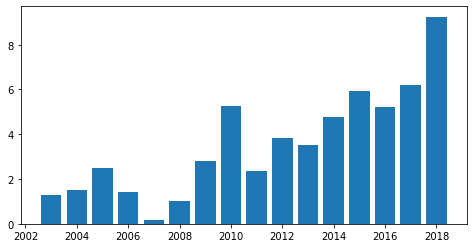

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(df2['Year'], df2['Selling_Price'])
plt.show()

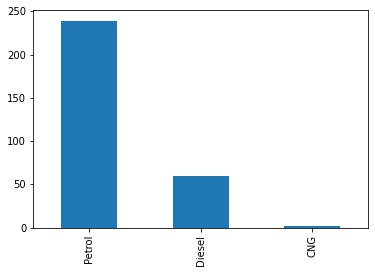

In [ ]:
df_car_data['Fuel_Type'].value_counts().plot(kind='bar')

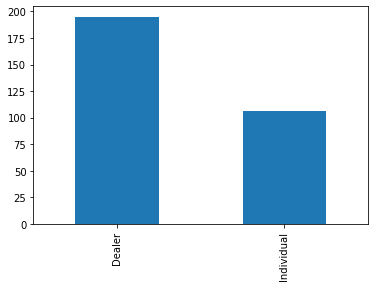

In [ ]:
df_car_data['Seller_Type'].value_counts().plot(kind='bar')

In [ ]:
Dealer=df_car_data[df_car_data['Seller_Type']=='Dealer']

In [ ]:
Dealer

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


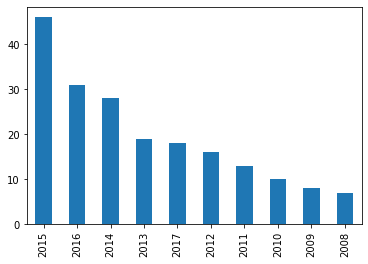

In [ ]:
# Top 10 car sold by delaer
Dealer['Car_Name'].value_counts()[:10].plot(kind='bar')

# Maximum year -car sold by dealer

Dealer['Year'].value_counts()[:10].plot(kind='bar')


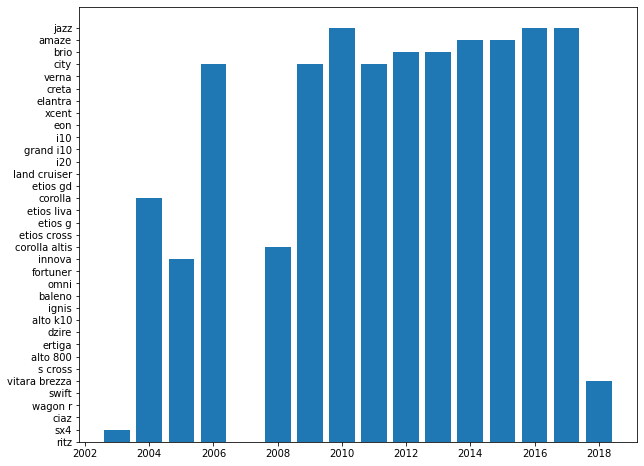

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(Dealer['Year'],Dealer['Car_Name'])
plt.show()

In [ ]:
object_columns = df_car_data.select_dtypes(include=['object']).columns
object_columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
Numerical_columns = df_car_data.select_dtypes(exclude=['object']).columns
Numerical_columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [ ]:
###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
def labelencoder(x):
  le = LabelEncoder()
  le_encoded=le.fit_transform(x)
  return le_encoded

In [ ]:
object_columns_1=['Fuel_Type', 'Seller_Type', 'Transmission','Owner']
for x in object_columns_1:
    #df_transformed[x]=  label_transformation(df[x])
    df_car_data[x] = labelencoder(df_car_data[x])
                     

In [ ]:
from IPython.lib.display import YouTubeVideo
X=df_car_data.iloc[:,3:]
Y=df_car_data['Selling_Price']

In [49]:
X


,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.59,27000,2,0,1,0
1,9.54,43000,1,0,1,0
2,9.85,6900,2,0,1,0
3,4.15,5200,2,0,1,0
4,6.87,42450,1,0,1,0
...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0
297,5.90,60000,2,0,1,0
298,11.00,87934,2,0,1,0
299,12.50,9000,1,0,1,0


In [ ]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split( df_car_data[['Present_Price',	'Kms_Driven','Fuel_Type',	'Seller_Type',	'Transmission',	'Owner']],df_car_data['Selling_Price'],test_size=0.20,random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(240, 6)
Shape of Test Xs:(61, 6)
Shape of Training y:(240,)
Shape of Test y:(61,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print("Accuracy on Traing set: ",lr.score(x_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.8716029407351054
Accuracy on Testing set:  0.2345087131073771


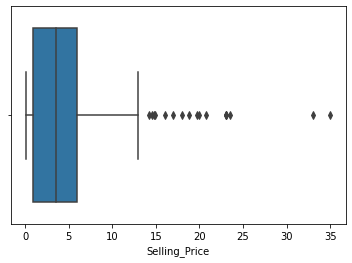

In [ ]:
import seaborn as sns
sns.boxplot(x =df_car_data['Selling_Price'])

In [ ]:
df_prediction = pd.DataFrame({"Actual Selling Price":y_test,"Predicted_Price":y_pred})

In [ ]:
df_prediction.head(n=10)

,Actual Selling Price,Predicted_Price
61,4.50,4.402329
239,2.00,3.834095
55,3.60,7.714931
245,5.20,5.516846
227,2.55,1.997064
147,0.55,-1.467635
264,4.00,4.112318
155,0.48,2.913683
285,7.40,7.747364
288,8.40,7.471622


In [41]:
Dealer.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [42]:
Dealer.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [53]:
#predictions with respect to new dataset
#data_new={'bedrooms':3.0,'bathrooms':2.00,'sqft_living':1570,'sqft_lot':7500,'floors':2.0,'waterfront':0,'view':4,'condition':5,
#         'sqft_above':3560,'sqft_basement':300,'yr_built':1932,'yr_renovated':2007,'city':2}

data_new={'Present_Price':6.56, 'Kms_Driven':27000,
       'Fuel_Type':2, 'Seller_Type':0, 'Transmission': 1, 'Owner':0}          
index=[1]#serial number
my_data=pd.DataFrame(data_new,index)

In [54]:
print(my_data)

   Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
1           6.56       27000          2            0             1      0


In [55]:
#Pricing allocated
# Here the linearmodel is the variable  used in 13
my_data_price=lr.predict(my_data)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")

 The predicted price for the given data is :[4.63]


In [ ]:
import joblib

In [ ]:
joblib.dump(le,filename= "reg_model.md")

['reg_model.md']